# Reading data from the first notebook

In [3]:
import pandas as pd
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df
   

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
     

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.000,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.000,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.000,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.000,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.000,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6152,CHEMBL5219841,0.209,active,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1
6153,CHEMBL5219046,274.000,active,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1
6154,CHEMBL5219594,76200.000,inactive,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
6155,CHEMBL5219958,55000.000,inactive,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1


# Lipinski Descriptors

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [7]:
'''
function to estimate molecule Lipinski descriptors

'''

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6152,390.461,2.8334,2.0,5.0
6153,352.478,5.0610,1.0,3.0
6154,287.246,2.1994,1.0,4.0
6155,311.337,3.1837,1.0,4.0


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0


# Convert ic50 values to pic50

In [11]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x


In [12]:
df_combined.standard_value.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0


In [14]:
-np.log10( (10**-9)* 100000000 )


1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x


In [17]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/m0/nhtrg77d2n3f4ph9rvbbp97w0000gn/T/ipykernel_26620/1998879194.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.000
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.000
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2.0,5.0,0.209
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1.0,3.0,274.000
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1.0,4.0,76200.000
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1.0,4.0,55000.000


In [18]:
df_norm.standard_value_norm.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

/var/folders/m0/nhtrg77d2n3f4ph9rvbbp97w0000gn/T/ipykernel_26620/3381531955.py:8: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/var/folders/m0/nhtrg77d2n3f4ph9rvbbp97w0000gn/T/ipykernel_26620/3381531955.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2.0,5.0,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1.0,3.0,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1.0,4.0,4.118045
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1.0,4.0,4.259637


In [20]:
df_final.pIC50.describe()

count    6157.000000
mean             inf
std              NaN
min         1.304518
25%         4.769551
50%         5.638272
75%         6.829738
max              inf
Name: pIC50, dtype: float64

In [21]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

# Removing intermediate class

In [22]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6151,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,active,454.057,6.19482,0.0,5.0,6.943095
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.83340,2.0,5.0,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.06100,1.0,3.0,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.19940,1.0,4.0,4.118045


# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [24]:
df_2class['class'].value_counts()

active      2608
inactive    2012
Name: class, dtype: int64

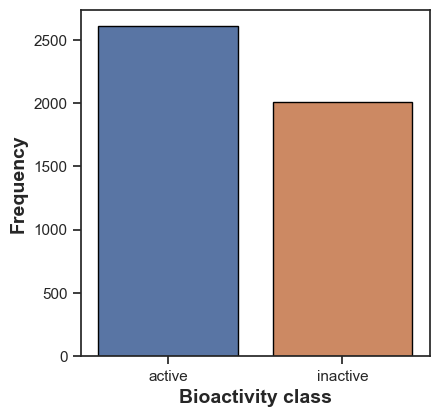

In [25]:
plt.figure(figsize=(4.5, 4.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

# Pairplot of the bioactivity classes

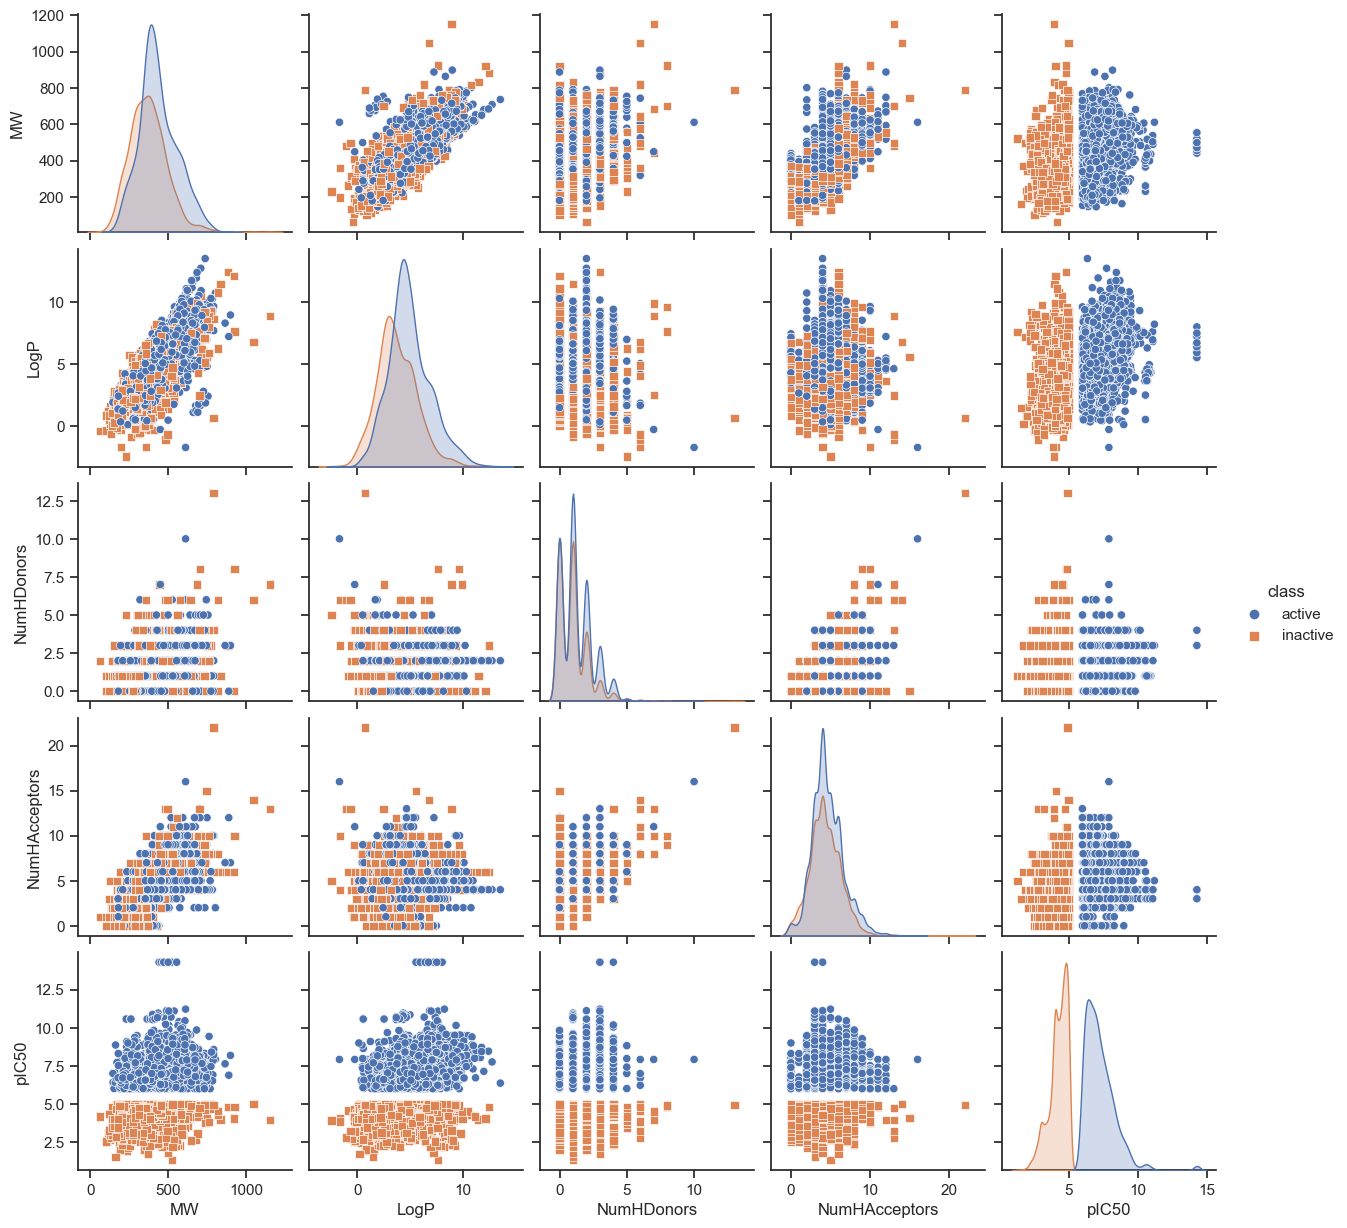

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
selection = ['class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
df = pd.DataFrame(df_2class[selection])
# Create the pair plot
sns.pairplot(df, hue='class', markers=['o', 's'])
# Display the plot
plt.show()


/Users/prarthanakandwal/anaconda3/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/prarthanakandwal/anaconda3/lib/python3.10/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


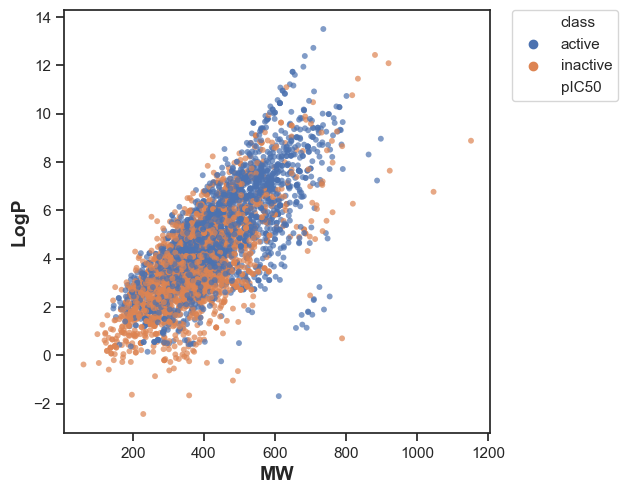

In [27]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


# Boxplot of pIC50

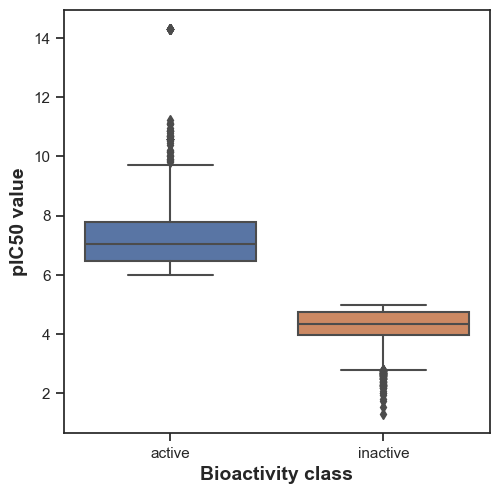

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [29]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3402939.0,2.507151e-67,0.05,Different distribution (reject H0)


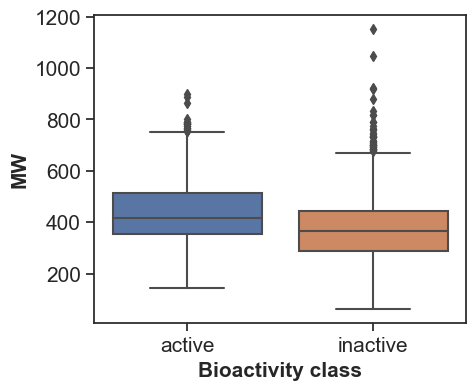

In [30]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='class', y='MW', data = df)
plt.xlabel('Bioactivity class', size=15, fontweight='bold')
plt.ylabel('MW', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2826735.5,0.000005,0.05,Different distribution (reject H0)


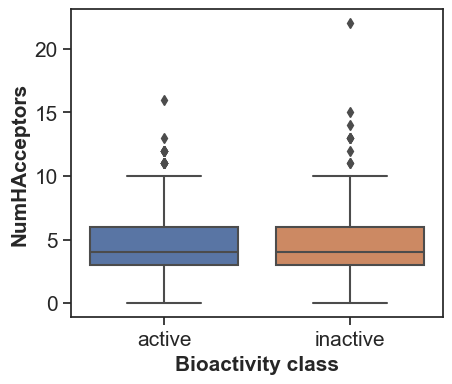

In [31]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='class', y='NumHAcceptors', data = df)
plt.xlabel('Bioactivity class', size=15, fontweight='bold')
plt.ylabel('NumHAcceptors', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3530973.5,1.340067e-90,0.05,Different distribution (reject H0)


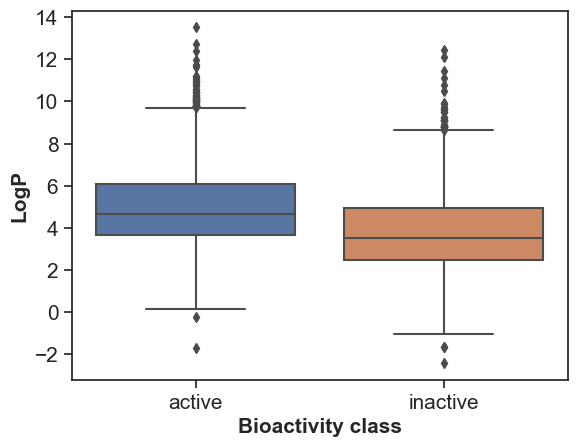

In [32]:

fig.add_subplot(2,2,3)
sns.boxplot(x='class', y='LogP', data = df)
plt.xlabel('Bioactivity class', size=15, fontweight='bold')
plt.ylabel('LogP', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3004079.0,6.682669e-19,0.05,Different distribution (reject H0)


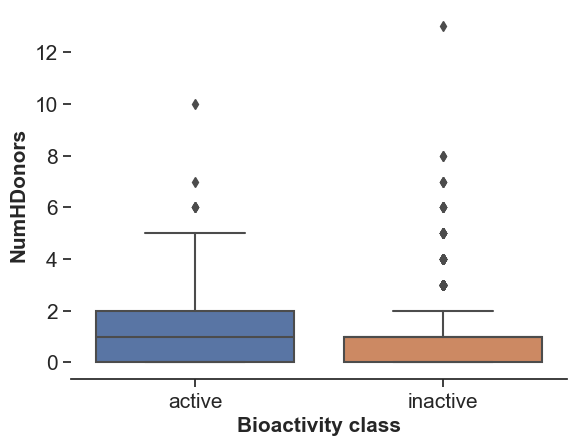

In [33]:

fig.add_subplot(2,2,4)
sns.boxplot(x='class', y='NumHDonors', data = df)
plt.xlabel('Bioactivity class', size=15, fontweight='bold')
plt.ylabel('NumHDonors', size=15, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

sns.despine(top=True, left=True)
plt.savefig('boxplot_lipinksi_descriptors.png',dpi=300);
mannwhitney('NumHDonors')

In [34]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5247296.0,0.0,0.05,Different distribution (reject H0)


In [35]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6152,6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2.0,5.0,9.679854
6153,6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1.0,3.0,6.562249
6154,6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1.0,4.0,4.118045
6155,6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1.0,4.0,4.259637


In [36]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [37]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
cat: stdout: Broken pipe


In [38]:
! cat molecule.smi | wc -l


    6157


In [39]:
df3_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
6152,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,CHEMBL5219841
6153,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,CHEMBL5219046
6154,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,CHEMBL5219594
6155,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,CHEMBL5219958


In [40]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors


# Calculating molecular descriptors using RDKit

In [41]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 208 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df3['canonical_smiles'])

In [42]:
desc_list = [n[0] for n in Descriptors._descList]
print(len(desc_list))
print(desc_list)

208
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 

In [43]:
df_with_208_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_208_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.382907,-3.393274,12.382907,0.097265,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,0
1,13.977627,-4.039636,13.977627,0.154614,0.734047,376.913,355.745,376.112460,132,0,...,1,0,0,0,0,0,0,0,0,0
2,13.647230,-5.598809,13.647230,0.183144,0.527034,426.851,412.739,426.052894,146,0,...,1,0,0,0,0,0,0,0,0,0
3,13.621049,-5.665488,13.621049,0.368049,0.695219,404.845,388.717,404.068544,140,0,...,1,0,0,0,0,0,0,0,0,0
4,12.860615,-5.379195,12.860615,0.044292,0.799502,346.334,333.230,346.071131,124,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,13.457846,-6.482092,13.457846,1.002777,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,0
6153,13.267161,-5.028056,13.267161,0.531055,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,0
6154,13.764197,-3.282950,13.764197,0.031652,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,0
6155,12.218485,-3.699022,12.218485,0.085489,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,0


# Preparing the X and Y Data Matrices

In [44]:
df3_X = pd.DataFrame(df_with_208_descriptors)
df3_X

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.382907,-3.393274,12.382907,0.097265,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,0
1,13.977627,-4.039636,13.977627,0.154614,0.734047,376.913,355.745,376.112460,132,0,...,1,0,0,0,0,0,0,0,0,0
2,13.647230,-5.598809,13.647230,0.183144,0.527034,426.851,412.739,426.052894,146,0,...,1,0,0,0,0,0,0,0,0,0
3,13.621049,-5.665488,13.621049,0.368049,0.695219,404.845,388.717,404.068544,140,0,...,1,0,0,0,0,0,0,0,0,0
4,12.860615,-5.379195,12.860615,0.044292,0.799502,346.334,333.230,346.071131,124,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,13.457846,-6.482092,13.457846,1.002777,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,0
6153,13.267161,-5.028056,13.267161,0.531055,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,0
6154,13.764197,-3.282950,13.764197,0.031652,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,0
6155,12.218485,-3.699022,12.218485,0.085489,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df3_Y = df3['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6152    9.679854
6153    6.562249
6154    4.118045
6155    4.259637
6156    5.267606
Name: pIC50, Length: 6157, dtype: float64

In [46]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,12.382907,-3.393274,12.382907,0.097265,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,13.977627,-4.039636,13.977627,0.154614,0.734047,376.913,355.745,376.112460,132,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,13.647230,-5.598809,13.647230,0.183144,0.527034,426.851,412.739,426.052894,146,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,13.621049,-5.665488,13.621049,0.368049,0.695219,404.845,388.717,404.068544,140,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,12.860615,-5.379195,12.860615,0.044292,0.799502,346.334,333.230,346.071131,124,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,13.457846,-6.482092,13.457846,1.002777,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,9.679854
6153,13.267161,-5.028056,13.267161,0.531055,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,6.562249
6154,13.764197,-3.282950,13.764197,0.031652,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,4.118045
6155,12.218485,-3.699022,12.218485,0.085489,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,4.259637


In [47]:
df_new = dataset3[np.isfinite(dataset3).all(1)]

In [48]:
df_new

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,12.382907,-3.393274,12.382907,0.097265,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,13.977627,-4.039636,13.977627,0.154614,0.734047,376.913,355.745,376.112460,132,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,13.647230,-5.598809,13.647230,0.183144,0.527034,426.851,412.739,426.052894,146,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,13.621049,-5.665488,13.621049,0.368049,0.695219,404.845,388.717,404.068544,140,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,12.860615,-5.379195,12.860615,0.044292,0.799502,346.334,333.230,346.071131,124,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,13.457846,-6.482092,13.457846,1.002777,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,9.679854
6153,13.267161,-5.028056,13.267161,0.531055,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,6.562249
6154,13.764197,-3.282950,13.764197,0.031652,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,4.118045
6155,12.218485,-3.699022,12.218485,0.085489,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,4.259637


In [49]:
df_new1=df_new.drop('pIC50',axis=1)
df_new1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.382907,-3.393274,12.382907,0.097265,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,0
1,13.977627,-4.039636,13.977627,0.154614,0.734047,376.913,355.745,376.112460,132,0,...,1,0,0,0,0,0,0,0,0,0
2,13.647230,-5.598809,13.647230,0.183144,0.527034,426.851,412.739,426.052894,146,0,...,1,0,0,0,0,0,0,0,0,0
3,13.621049,-5.665488,13.621049,0.368049,0.695219,404.845,388.717,404.068544,140,0,...,1,0,0,0,0,0,0,0,0,0
4,12.860615,-5.379195,12.860615,0.044292,0.799502,346.334,333.230,346.071131,124,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,13.457846,-6.482092,13.457846,1.002777,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,0
6153,13.267161,-5.028056,13.267161,0.531055,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,0
6154,13.764197,-3.282950,13.764197,0.031652,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,0
6155,12.218485,-3.699022,12.218485,0.085489,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of each column
X_imputed = imputer.fit_transform(df_new1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_new1.columns)
print(X_scaled_df)
type(X_scaled_df)

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          -0.062923        1.298063          -0.062923          -0.957429   
1           0.607568        0.575279           0.607568          -0.838247   
2           0.468654       -1.168243           0.468654          -0.778954   
3           0.457646       -1.242806           0.457646          -0.394683   
4           0.137926       -0.922663           0.137926          -1.067519   
...              ...             ...                ...                ...   
6114        0.389029       -2.155962           0.389029           0.924417   
6115        0.308856       -0.530007           0.308856          -0.055923   
6116        0.517832        1.421431           0.517832          -1.093788   
6117       -0.132053        0.956166          -0.132053          -0.981902   
6118        0.601088        0.603224           0.601088          -0.980878   

           qed     MolWt  HeavyAtomMolWt  ExactMolWt  NumValenc

pandas.core.frame.DataFrame

In [51]:
X_scaled_df.columns


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=208)

# Input features

In [52]:
X = X_scaled_df
X.columns

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=208)

# Output Feature

In [53]:
Y = df_new.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6152    9.679854
6153    6.562249
6154    4.118045
6155    4.259637
6156    5.267606
Name: pIC50, Length: 6119, dtype: float64

In [54]:
X.shape

(6119, 208)

In [55]:
Y.shape

(6119,)

# Remove low variance features

In [56]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.1)) 
X1 = selection.fit_transform(X)
# Get the column names corresponding to the selected features
selected_columns = X.columns[selection.get_support()]
X = pd.DataFrame(X1, columns=selected_columns)
print(X)




      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          -0.062923        1.298063          -0.062923          -0.957429   
1           0.607568        0.575279           0.607568          -0.838247   
2           0.468654       -1.168243           0.468654          -0.778954   
3           0.457646       -1.242806           0.457646          -0.394683   
4           0.137926       -0.922663           0.137926          -1.067519   
...              ...             ...                ...                ...   
6114        0.389029       -2.155962           0.389029           0.924417   
6115        0.308856       -0.530007           0.308856          -0.055923   
6116        0.517832        1.421431           0.517832          -1.093788   
6117       -0.132053        0.956166          -0.132053          -0.981902   
6118        0.601088        0.603224           0.601088          -0.980878   

           qed     MolWt  HeavyAtomMolWt  ExactMolWt  NumValenc

In [57]:
X.shape

(6119, 194)

In [58]:
Y.shape

(6119,)

# Data split (80/20 ratio)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [61]:
X_train.shape, Y_train.shape


((4895, 194), (4895,))

In [62]:
X_test.shape, Y_test.shape

((1224, 194), (1224,))

# Random Forest Regressor using default parameters

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score for training data:", r2_train)
print("R-squared (R2) score for testing data:", r2_test)
cv_score_default = cross_val_score(model, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))

Root Mean Squared Error (RMSE): 0.8201985508025643
Mean Absolute Error (MAE): 0.5909958698416888
Mean Squared Error (MSE): 0.6727256627386267
R-squared (R2) score for training data: 0.956934087205592
R-squared (R2) score for testing data: 0.7421262006479761
CV Score with the default Parameters): 0.7015567611471123


In [70]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [323]:
X_test = pd.DataFrame(X_test, columns=selected_columns)


In [324]:
X_test

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
2094,0.916117,-2.061010,0.916117,1.553151,0.066279,0.902312,0.809203,0.905025,1.175782,-0.242184,...,-0.636483,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
1612,-1.807729,0.292111,-1.807729,-1.159567,-0.577732,-0.248261,-0.203225,-0.261315,-1.083569,-1.145770,...,2.515796,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
5857,-1.496470,-0.581204,-1.496470,0.773379,-0.795907,0.245478,0.198657,0.243793,0.297146,-1.234917,...,0.939657,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
4293,-1.548181,1.996391,-1.548181,-0.348014,0.792993,-0.647446,-0.554655,-0.646100,-0.665171,0.128202,...,0.939657,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
2571,1.013930,0.060573,1.013930,0.209085,1.125795,-0.214299,-0.209221,-0.212642,-0.121253,-0.530623,...,0.939657,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,-0.026668,0.618799,-0.026668,0.369133,1.418618,-1.251404,-1.278087,-1.250758,-1.125409,1.531921,...,-0.636483,-0.193604,-0.196377,-0.11363,-0.018082,6.308210,-0.022148,-0.163,-0.11245,-0.103618
5533,0.837274,-0.525597,0.837274,-0.939648,-0.005783,1.041831,1.060421,1.037456,0.715544,-0.218009,...,-0.636483,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
3469,0.287249,0.571105,0.287249,-0.524654,0.758272,-1.848871,-1.858929,-1.848694,-1.753006,-0.839009,...,-0.636483,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618
3312,-1.249714,0.536335,-1.249714,-0.427288,0.293561,-0.214362,-0.166902,-0.212761,-0.204932,-1.147032,...,2.515796,-0.193604,-0.196377,-0.11363,-0.018082,-0.156358,-0.022148,-0.163,-0.11245,-0.103618


/Users/prarthanakandwal/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


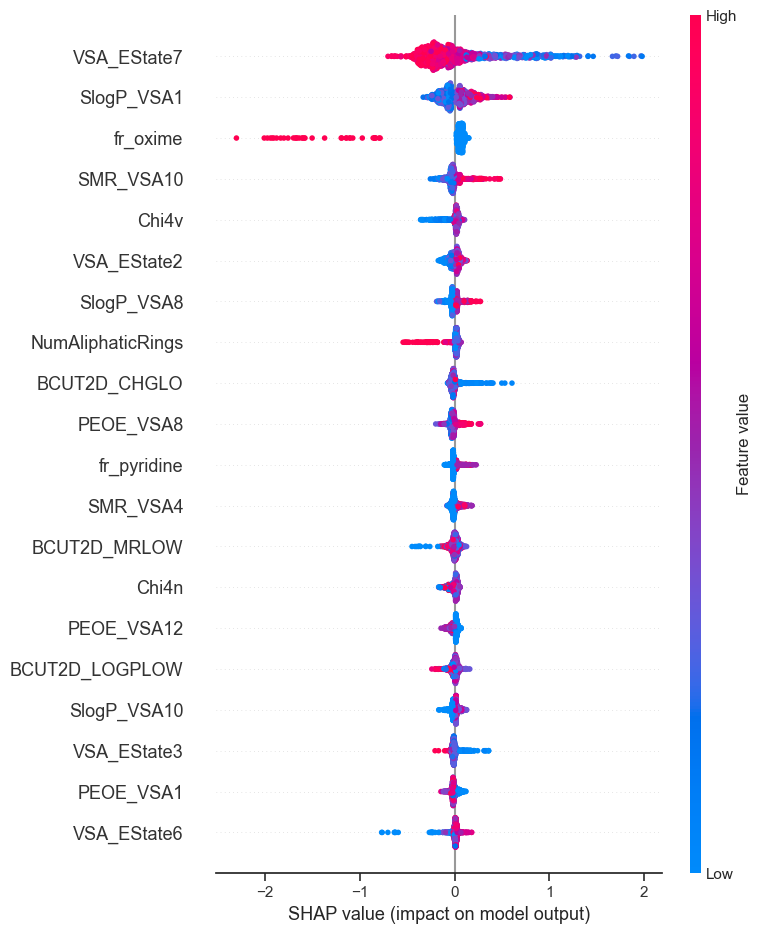

In [69]:
import shap
explainer = shap.TreeExplainer(model)

# Calculate Shapley values for the entire test set
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


# Scatter plot for training and testing data

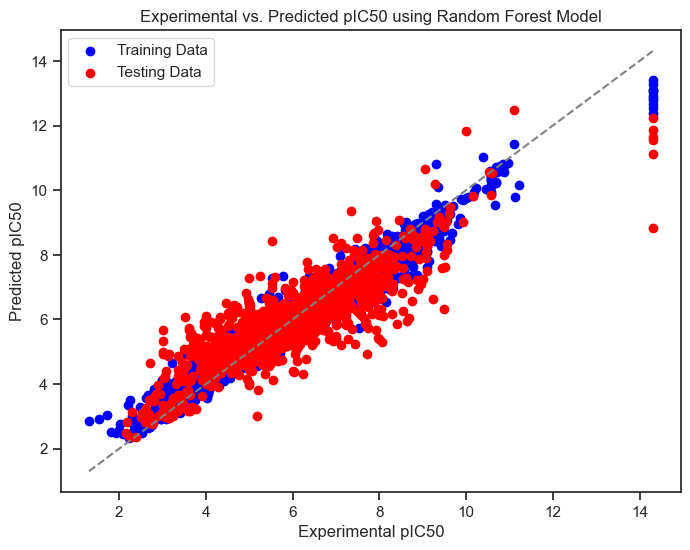

In [66]:
import matplotlib.pyplot as plt
predicted_pIC50_training = model.predict(X_train)
experimental_pIC50_training = Y_train
predicted_pIC50_testing = model.predict(X_test)
experimental_pIC50_testing = Y_test

# Create a scatter plot for the training data
plt.figure(figsize=(8, 6))
plt.scatter(experimental_pIC50_training, predicted_pIC50_training, color='blue', label='Training Data')

# Create a scatter plot for the testing data
plt.scatter(experimental_pIC50_testing, predicted_pIC50_testing, color='red', label='Testing Data')

plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Experimental vs. Predicted pIC50 using Random Forest Model')
plt.legend()

# Add a diagonal line for reference (ideal prediction)
min_value = min(min(experimental_pIC50_training), min(predicted_pIC50_training),
                min(experimental_pIC50_testing), min(predicted_pIC50_testing))
max_value = max(max(experimental_pIC50_training), max(predicted_pIC50_training),
                max(experimental_pIC50_testing), max(predicted_pIC50_testing))
plt.plot([min_value, max_value], [min_value, max_value], color='gray', linestyle='--')

# Show the plot
plt.show()


/var/folders/m0/nhtrg77d2n3f4ph9rvbbp97w0000gn/T/ipykernel_28279/1833485259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.iloc[:,:-1].corr()


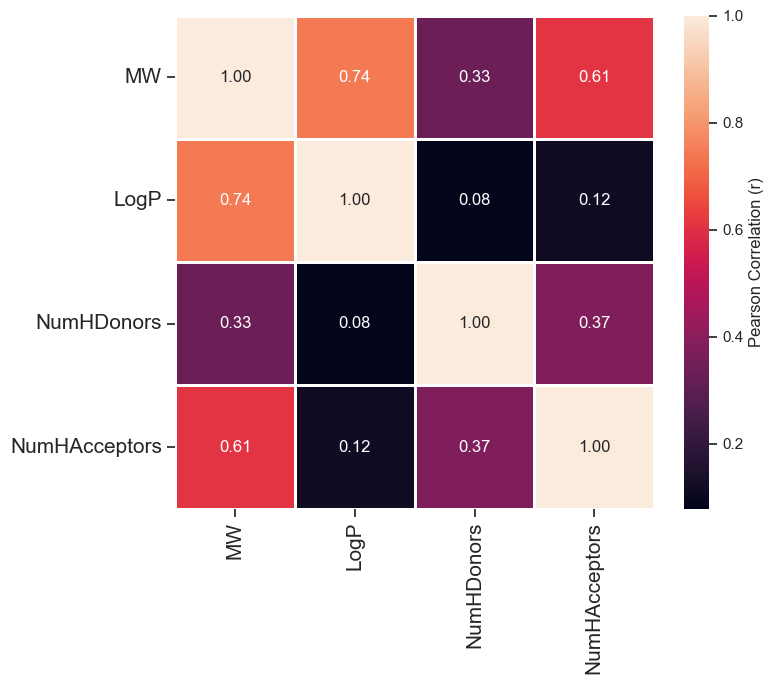

In [64]:
plt.figure(figsize=(8,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15,rotation=0)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

# Hyperparameter tuning using Grid Search CV

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# grid with various combinations to try
grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initializing GridSearchCV with the model, parameter grid, and number of cross-validation folds
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=10, n_jobs=-1)

# Perform grid search on the training data to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best model with the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
test_score = best_rf_regressor.score(X_test, Y_test)
print("Test Set Score:", test_score)
Y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model's performance on the test set
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
cv_score_default = cross_val_score(best_rf_regressor, X_train, Y_train, cv=5)
print("CV Score with hyperparameter tuning):", np.mean(cv_score_default))
# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)
print(grid_search.best_estimator_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Test Set Score: 0.7408619699647278
CV Score with hyperparameter tuning): 0.689180399276261
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(max_depth=20)
Mean Squared Error (MSE): 0.6760237117315051
Root Mean Squared Error (RMSE): 0.822206611340182
Mean Absolute Error (MAE): 0.5935847375014691
R-squared (R2): 0.7408619699647278


# Q2 value for testing data 

In [78]:
variance = np.var(Y_test)

# Calculate the Q² value
q2 = 1 - (mse / variance)

print("Q² value:", q2)

Q² value: 0.7405401421718232


# feature importance

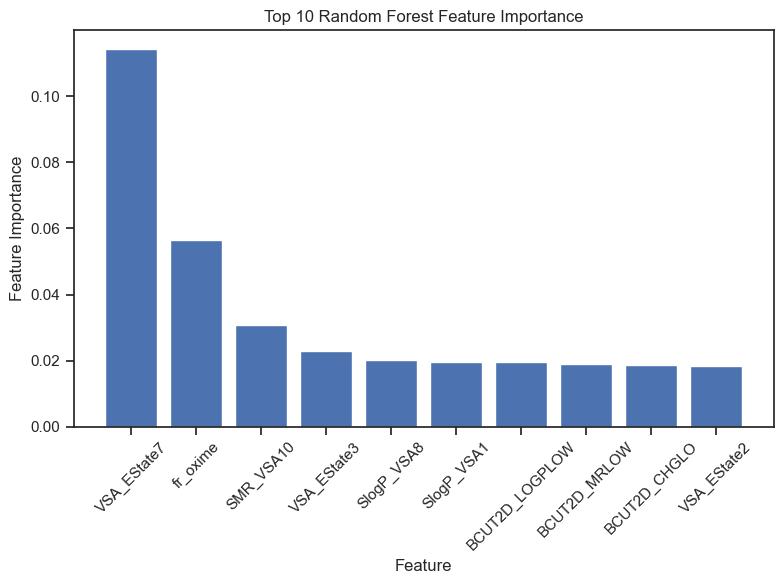

In [73]:
best_rf_regressor.fit(X_train, Y_train)
importances = best_rf_regressor.feature_importances_
feature_names = X_test.columns

# Sort feature importances in descending order and take the top 10 features
indices = np.argsort(importances)[::-1][:10]
top_feature_names = [feature_names[i] for i in indices]
top_importances = importances[indices]

# Plot the barplot for top 10 features
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_importances)), top_importances, align='center')
plt.xticks(range(len(top_importances)), top_feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importance')
plt.tight_layout()
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


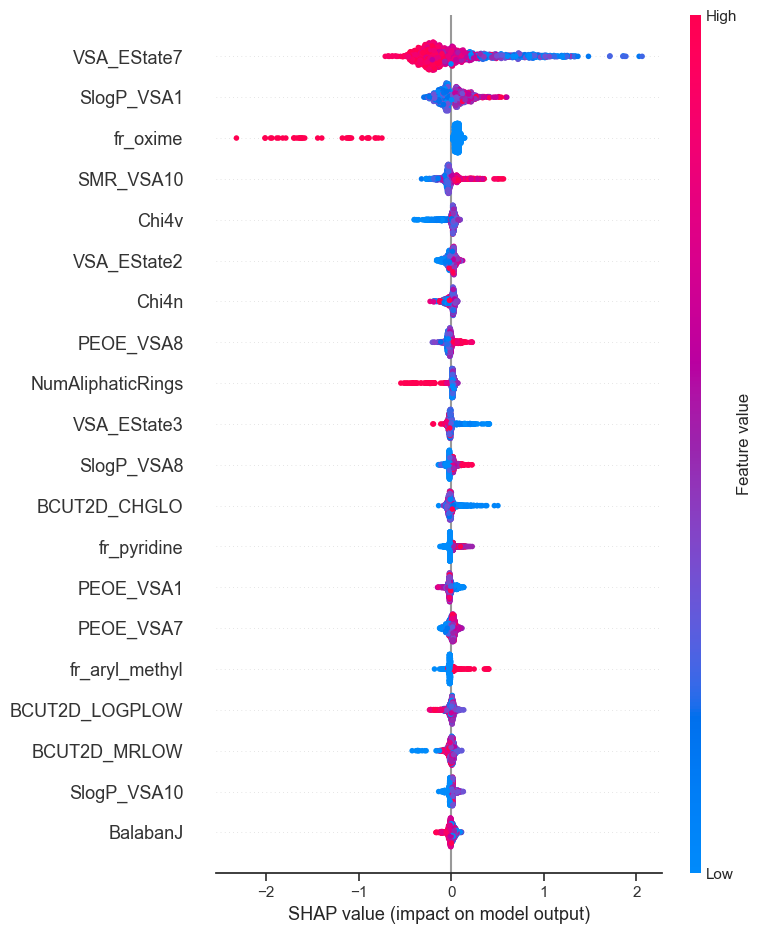

In [71]:
import shap
explainer = shap.TreeExplainer(best_rf_regressor)

# Calculate Shapley values for the entire test set
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [96]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
best_rf_regressor.fit(X, Y)
explainer = shap.TreeExplainer(best_rf_regressor)

# Calculate SHAP values for the dataset
shap_values = explainer.shap_values(X)

# Plot summary plot
shap.summary_plot(shap_values, X)

# Installing Xgboost

In [90]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Default XGBoost

In [65]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgbr.fit(X_train, Y_train)

# Make predictions on the testing and training data
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score for training data:", r2_train)
print("R-squared (R2) score for testing data:", r2_test)
cv_score_default = cross_val_score(xgbr, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))


Root Mean Squared Error (RMSE): 0.837367079241628
Mean Absolute Error (MAE): 0.5993901812488588
Mean Squared Error (MSE): 0.7011836253976549
R-squared (R2) score for training data: 0.9748086959552034
R-squared (R2) score for testing data: 0.7312174998815644
CV Score with the default Parameters): 0.6909306697305777


# Hyperparameter tuning using Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# grid with various combinations to try
grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initializing GridSearchCV with the model, parameter grid, and number of cross-validation folds
grid_search = GridSearchCV(xgbr, grid, cv=5, n_jobs=-1)

# Perform grid search on the training data to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best model with the best hyperparameters
best_xgbr_regressor = grid_search.best_estimator_
test_score = best_xgbr_regressor.score(X_test, Y_test)
print("Test Set Score:", test_score)
Y_pred = best_xgbr_regressor.predict(X_test)

# Evaluate the model's performance on the test set
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)
print(grid_search.best_estimator_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Test Set Score: 0.7370644510103654
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)
Mean Squared Error (MSE): 0.6859304508486826
Root Mean Squared Error (RMSE): 0.8282091830260533
Mean Absolute Error (MAE): 0.5903446416194683
R-squa

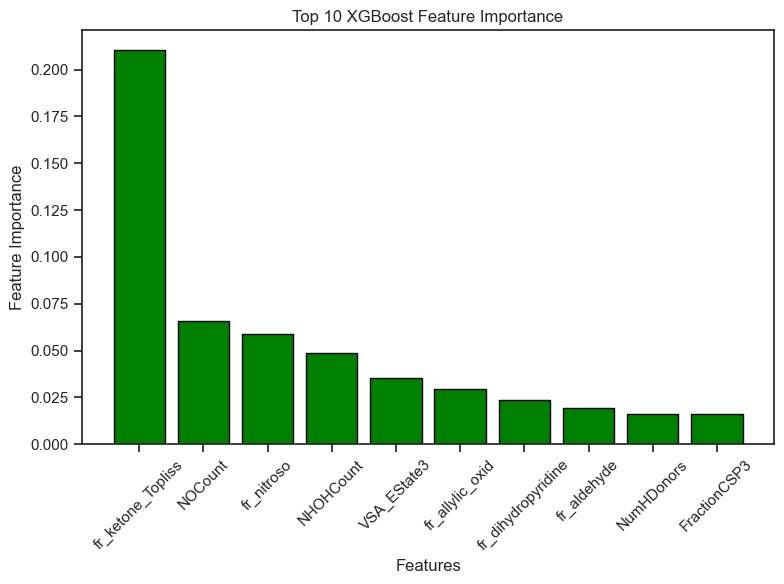

In [94]:
xgbr.fit(X_train, Y_train)
importances = xgbr.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order and take the top 10 features
indices = np.argsort(importances)[::-1][:10]
top_feature_names = [feature_names[i] for i in indices]
top_importances = importances[indices]

# Plot the barplot for top 10 features
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_importances)), top_importances, align='center', color='green', edgecolor='black')
plt.xticks(range(len(top_importances)), top_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 10 XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# SVR

In [80]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
svr_model.fit(X_train, Y_train)

# Predict the target values on the test set

y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred)
from sklearn.model_selection import train_test_split, cross_val_score
cv_score_default = cross_val_score(svr_model, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score for training data:", r2_train)
print("R-squared (R2) score for testing data:", r2_test)

CV Score with the default Parameters): 0.6096584586230336
Root Mean Squared Error (RMSE): 1.006099624218426
Mean Absolute Error (MAE): 0.6973050248800017
Mean Squared Error (MSE): 1.012236453852458
R-squared (R2) score for training data: 0.707830300108111
R-squared (R2) score for testing data: 0.6119826035253089


# SVR using hyperparameter tuning

In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score


param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels to try
    'C': [0.1, 1.0, 10.0],               # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5]          # Epsilon-tube width
}
svr_model = SVR()

# Perform Grid earch with 5-fold cross-validation
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters on the training data
best_svr_model = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr_model.fit(X_train, Y_train)

# Predict the target values on the test set using the best model
y_pred = best_svr_model.predict(X_test)

# Calculate the R-squared value on the test set
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
from sklearn.model_selection import train_test_split, cross_val_score
cv_score_default = cross_val_score(svr_model, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))
print("Best hyperparameters:", best_params)
print("R-squared value on test set with the best model:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


CV Score with the default Parameters): 0.6096584586230336
Best hyperparameters: {'C': 10.0, 'epsilon': 0.1, 'kernel': 'rbf'}
R-squared value on test set with the best model: 0.7132419061445657
Root Mean Squared Error (RMSE): 0.8649146047627208
Mean Absolute Error (MAE): 0.5945177465039068
Mean Squared Error (MSE): 0.7480772735318535


# KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 5
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the KNN regression model on the training data
knn_regressor.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)
from sklearn.model_selection import train_test_split, cross_val_score
cv_score_default = cross_val_score(knn_regressor, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score for training data:", r2_train)
print("R-squared (R2) score for testing data:", r2_test)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

CV Score with the default Parameters): 0.6475542661335832
Root Mean Squared Error (RMSE): 0.92490805821154
Mean Absolute Error (MAE): 0.6473356564202802
Mean Squared Error (MSE): 0.8554549161446414
R-squared (R2) score for training data: 0.7811874853006313
R-squared (R2) score for testing data: 0.6720811742151496
Mean Squared Error: 0.8554549161446414
R-squared: 0.6424710240446363


# KNN Regressor using hyperparameter tuning

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create a KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



print("Best Hyperparameters:", best_params)

y_test_pred = best_model.predict(X_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred)
from sklearn.model_selection import train_test_split, cross_val_score
cv_score_default = cross_val_score(best_model, X_train, Y_train, cv=10)
print("CV Score with the default Parameters):", np.mean(cv_score_default))
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score for training data:", r2_train)
print("R-squared (R2) score for testing data:", r2_test)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}
CV Score with the default Parameters): 0.6739294003879889
Root Mean Squared Error (RMSE): 0.8763881106295873
Mean Absolute Error (MAE): 0.5955471620904765
Mean Squared Error (MSE): 0.7680561204528977
R-squared (R2) score for training data: 0.7811874853006313
R-squared (R2) score for testing data: 0.7055834779805076
Mean Squared Error: 0.7680561204528977
R-squared: 0.6424710240446363
